# House Prices Data Analysis 

분석 목적 : 딥러닝으로 집값 예측하기 

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

# 밑에 실행하면서 뜨는 빨간 경고 팝업 뜨지 않게 하기 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
house_test = pd.read_csv("./data/house_test.csv", header=0)
house_test


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [10]:
house_train = pd.read_csv("./data/house_train.csv", header = 0)
house_train 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [11]:
house_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [12]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 컬럼 설명 

- MSSubClass : 매매와 관련된 주거 타입 식별
- MSZoning : 매매의 일반적인 지역 분류
- LotFrontage : 부동산과 연결된 도로의 선형 피트
- LotArea : 평방피트 단위의 부지 크기
- Street : 부동산으로의 도로(street) 접근 유형
- Alley : 부동산으로의 골목(alley) 접근 유형
- LotShape : 부동산의 일반적인 모양
- LandContour : 부동산의 평탄도
- Utilities : 사용 가능한 유틸리티(수도전기가스) 유형
- LotConfig : 지역 구성
- LandSlope : 부동산의 경사
- Neighborhood : 에임스 시 경계 내의 물리적인 위치
- Condition1 : 주요 도로 및 철도와의 근접성
- Condition2 : 주요 도로 및 철도와의 근접성 (두 개 이상 존재하는 경우)
- BldgType : 주거 유형
- HouseStyle : 주거 스타일
- OverallQual : 전체적인 재료 및 마감 등급
- OverallCond : 집의 전체적인 상태 등급
- YearBuilt : 원래 공사일
- YearRemodAdd : 리모델링 날짜 (리모델링 혹은 추가가 없었던 경우 공사일과 동일)
- RoofStyle : 지붕 유형
- RoofMatl : 지붕 재료
- Exterior 1st : 주택 외장재
- Exterior 2nd : 주택 외장재 (두 개 이상 존재하는 경우)
- MasVnrType : 벽돌 베니어 유형
- MasVnrArea : 벽돌 베니어 면적 (평방피트)
- ExterQual : 외장재 품질
- ExterCond : 외장재 현재 상태
- Foundation : 토대 유형
- BsmtQual : 지하의 높이 평가
- BsmtCond : 지하실 일반적인 상태 평가
- BsmtExposure : 워크아웃 혹은 정원 수준의 벽
- BsmtFinType1 : 지하 마감면의 품질
- BsmtSF1 : 유형 1 마감 평방피트
- BsmtFinType2 : 지하 마감면의 품질 (있는 경우)
- BsmtSF2 : 유형 2 마감 평방피트
- BsmtUnfSF : 마감되지 않은 지하실 면적
- TotalBsmtSF : 지하 총 평방피트
- Heating : 난방 유형
- HeatingQC : 난방 품질 및 상태
- CentralAir : 중앙 에어컨 여부
- Electrial : 전기 시스템
- 1stFlrSF : 1층 평방피트
- 2ndFlrSF : 2층 평방피트
- LowQualFinSF : 저품질 마감 평방 피트 (모든 층)
- GrLivArea : 지상 거실 면적 평방 피트
- BsmtFullBath : 지하 전체 욕실
- BsmtHalfBath : 지하 반 욕실
- FullBath : 지하층 위의 전체 욕실
- HalfBath : 지하층 위의 반 욕실
- Bedroom : 지하층 위의 침실 수 (지하 침실은 포함하지 않음)
- Kitchen : 지하층 위의 주방 수
- KitchenQual : 주방 품질
- TotRmsAbvGra : 지하층 위의 모든 방 (욕실 제외)
- Functional : 집 기능 (공제가 보장되지 않는 한 일반적인 경우 가정)
- FirePlace : 벽난로 수
- FireplaceQu : 벽난로 품질
- GarageType : 차고 위치
- GarageYrBlt : 차고 건설 연도
- GarageFinish : 차고 내부 마감
- GarageCars : 차량 수용 가능 차고 크기
- GarageArea : 차고 평방피트
- GarageQual : 차고 품질
- GarageCond : 차고 상태
- PavedDrive : 포장된 진입로
- WoodDeckSF : 평방피트 단위의 목재 데크 면적
- OpenPochSF : 평방피트 단위의 개방 현관 면적
- EnclosedPorch : 평방피트 단위의 닫힌 현관 면적
- 3SnPorch : 평방 피트의 세 계절 현관 면적
- ScreenPorch : 평방피트 단위의 스크린 현관 면적
- PoolArea : 평방피트 단위의 수영장 면적
- PoolQC : 수영장 품질
- Fence : 울타리 품질
- MiscFeature : 다른 항목에서 다루지 않는 기타 특징
- MiscVal : 기타 특징의 가치
- MoSold : 월 판매
- YrSold : 연 판매
- SaleType : 판매 유형
- SaleCondition : 판매 상태

In [13]:
house_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
house_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

'SalePrice' : 부동산 판매 가격(달러) - 예측하려는 대상 변수 

## EDA 진행하기 

In [23]:
house_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [24]:
house_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [16]:
house_train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [17]:
house_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [22]:
house_train[['SalePrice']][:20]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
5,143000
6,307000
7,200000
8,129900
9,118000


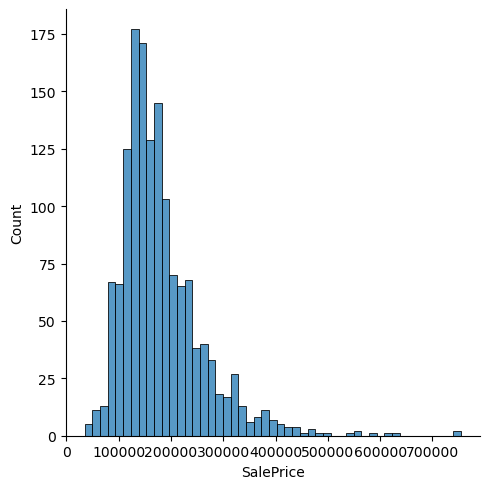

In [18]:
sns.displot(house_train['SalePrice'])